In [2]:
import pandas as pd
import numpy as np
# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Modelling
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
# import graphviz
# Scaling with Minmax-scaler
from sklearn.preprocessing import MinMaxScaler

# from ydata_profiling import ProfileReport

# import custom functions
from custom_functions import our_metrics

pd.set_option('display.max_rows', 10)

In [3]:
breed_df = pd.read_csv('../data/petfinder-adoption-prediction/eda/df_eda.csv')

In [4]:
breed_df.head()

,type,gender,maturitysize,furlength,sterilized,health,quantity,photoamt,adoptionspeed,color_pattern,breed_type,vaccinated_dewormed,fee_bin,age_bin,photoamt_11,description_char
0,1,0,0,0,1,0,1,1.0,2,2,0,2,1,0,1.0,359.0
1,1,0,1,1,1,0,1,2.0,1,0,1,2,0,0,2.0,118.0
2,0,0,1,1,1,0,1,7.0,3,2,1,0,0,0,7.0,393.0
3,0,1,1,0,1,0,1,8.0,2,0,1,0,1,1,8.0,146.0
4,0,0,1,0,1,0,1,3.0,2,0,1,2,0,0,3.0,390.0


In [5]:
breed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 14993 non-null  int64  
 1   gender               14993 non-null  int64  
 2   maturitysize         14993 non-null  int64  
 3   furlength            14993 non-null  int64  
 4   sterilized           14993 non-null  int64  
 5   health               14993 non-null  int64  
 6   quantity             14993 non-null  int64  
 7   photoamt             14993 non-null  float64
 8   adoptionspeed        14993 non-null  int64  
 9   color_pattern        14993 non-null  int64  
 10  breed_type           14993 non-null  int64  
 11  vaccinated_dewormed  14993 non-null  int64  
 12  fee_bin              14993 non-null  int64  
 13  age_bin              14993 non-null  int64  
 14  photoamt_11          14993 non-null  float64
 15  description_char     14993 non-null 

In [6]:
# select quantity == 1
breed_df = breed_df[breed_df["quantity"]==1]

In [7]:
# remove the quantity column
breed_df = breed_df.drop("quantity", axis=1)

In [8]:
# remove the description_char column
breed_df = breed_df.drop("description_char", axis=1)

In [9]:
breed_df.type.value_counts()

type
0    6622
1    4943
Name: count, dtype: int64

In [10]:
# plot settings

# custom color palette: 
colors = ['#365b6d', '#41c1ba', '#289dd2', '#6c9286', '#f2f1ec', '#fa9939']
#365b6d - dark blue
#41c1ba - turquoise
#289dd2 - medium blue
#6c9286 - muddy green
#fa9939 - orange 
#f2f1ec - off-white
sns.set(style="white", rc={"axes.facecolor": "#f2f1ec", "figure.facecolor": "#f2f1ec"}) 
# Set your custom color palette
custom_palette = sns.set_palette(sns.color_palette(colors))
#sns.set_style("darkgrid")

# for multiple plots
# sns.despine(left=True, bottom=True)

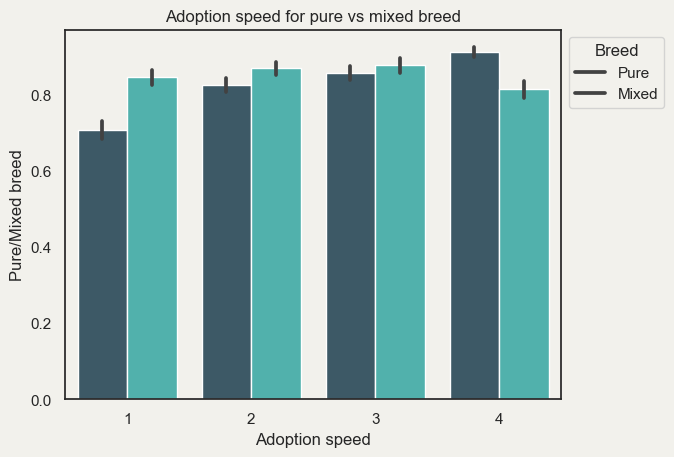

In [11]:

ax=sns.barplot(x=breed_df['adoptionspeed'], y=breed_df['breed_type'], hue=breed_df['type']).set(title='Adoption speed for pure vs mixed breed', xlabel='Adoption speed', ylabel='Pure/Mixed breed')
plt.legend( loc='upper left' , bbox_to_anchor=(1, 1), title='Breed', labels=['Pure', 'Mixed'])

plt.show(ax)


<Axes: xlabel='breed_type', ylabel='count'>

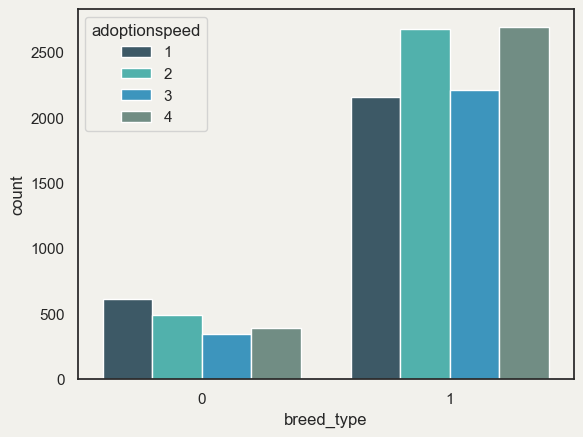

In [12]:

sns.countplot(data=breed_df, x="breed_type", hue="adoptionspeed")



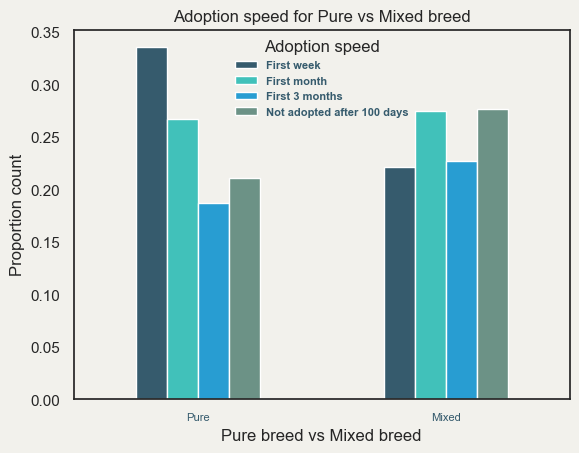

In [13]:
pd.crosstab(breed_df.breed_type,breed_df.adoptionspeed,normalize="index").plot.bar(title='Adoption speed for Pure vs Mixed breed', xlabel='Pure breed vs Mixed breed', ylabel='Proportion count')
x_labels = ['Pure', 'Mixed']
plt.xticks(ticks=np.linspace(0,1,2),labels=x_labels,color='#365b6d',fontsize=8, rotation = 0)
ax = plt.gca()
legend = ax.legend(title="Adoption speed", loc="upper center",frameon=False, labelcolor='#365b6d', fontsize=8)
labellist = ["First week", "First month", "First 3 months", "Not adopted after 100 days"]
for i,label in enumerate(legend.get_texts()):
    label.set_weight('bold')
    label.set_text(labellist[i]) 

In [14]:
sns.countplot(data=pd.crosstab(breed_df["breed_type"],breed_df['adoptionspeed'],normalize="index"), x=breed_df['adoptionspeed'], hue=breed_df['type'])

plt.show();

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

/Users/qurratulain/.pyenv/versions/3.11.3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


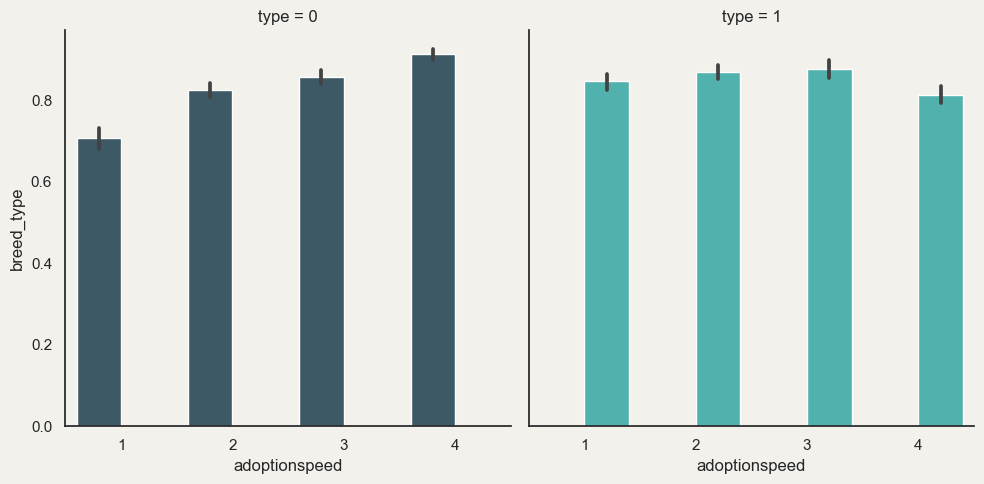

In [ ]:
sns.catplot(data=breed_df, y="breed_type", x="adoptionspeed", col='type', kind='bar', hue='type')